In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from distinctipy import distinctipy

from src.modules.court_detection import CourtDetector
from src.utils.utils import draw_line, load_image, display_image

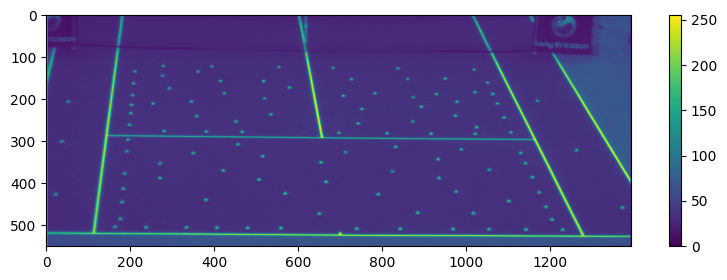

In [2]:
image = load_image("../assets/image.raw", 1392, 550)
display_image(image)

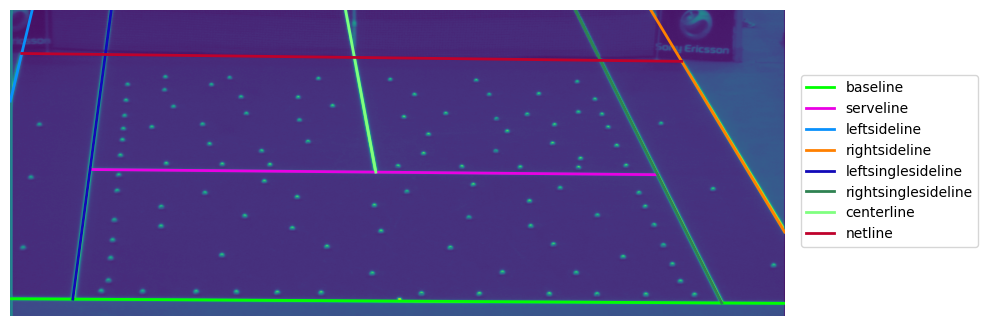

In [4]:
from calib3d import Point3D, ProjectiveDrawer

# Construct court detector instance
cd = CourtDetector(debug=False) # Set to debug=True to display debug info

# Call court detector on the given image
data = cd(image)

# Extract the genereted calibration object
calib = data['calib']

# Prepare list of lines in 3D world representation
labelled_lines = cd.court.lines

# Use a Projective Drawer to draw lines once projected using the given calib
pd = ProjectiveDrawer(calib, color=[200, 100, 20])

fig = plt.figure(figsize=(10, 4))
ax = fig.gca()
ax.imshow(image)
# Draw each line on the input image with a different distinctive color
for color, (label, line) in zip(distinctipy.get_colors(len(labelled_lines)), labelled_lines.items()):
    color = list(map(lambda x: x*255, color))
    p1 = Point3D(line[0])
    p2 = Point3D(line[1])
    pd.draw_line(ax, p1, p2, thickness=2, color=color, label=label)

ax.axis('off')
fig.legend(loc=7, bbox_to_anchor=(1.1, 0, 0, 1))